In [1]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["load-graphml" false]
["N-turtles" 80]
["percentage-unhappy" [10 10 40]]
["clear-before-generating" true]
["arduino-on" false]
["mutated" 0]
["links-to-use" "undirected"]
["frac-providers" 0.05 0.05 0.15]



( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["load-graphml" false]\n["N-turtles" 80]\n["percentage-unhappy" [10 10 40]]\n["clear-before-generating" true]\n["arduino-on" false]\n["mutated" 0]\n["links-to-use" "undirected"]\n["frac-providers" 0.05 0.05 0.15]\n\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/FINAL/CA_5-STATES_NETWORK__58_Arduino_28_PERFECT_DOC_BREED_aligned_BEHAVIOR_SIMILARITY_SEGREGATION_CENTROIDE_BEST experiment_centroid_links_mutated-table.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       'mean [ state ] of turtles with [ breed = clients ]',
       'mean [ state ] of turtles with [ breed = service-providers ]',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y', 'count links'],
      dtype='object')

In [3]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links
0,1,1.5,1,10,0.05,0,2.636364,2.333333,0.079167,0.000000,0.375417,0.0875,0.000000,0.000000,25
1,11,1.5,1,20,0.05,0,2.610390,3.666667,0.000000,0.000000,0.329167,0.0125,0.000000,0.000000,14
2,2,1.5,1,10,0.05,0,2.844156,3.333333,0.000000,0.000000,0.243750,0.0875,0.000000,0.000000,14
3,4,1.5,1,10,0.05,0,2.662338,2.666667,0.041667,0.000000,0.397917,0.0250,0.000000,0.000000,20
4,8,1.5,1,10,0.05,0,2.909091,3.333333,0.037500,0.000000,0.374286,0.1375,0.000000,0.000000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,324,5.5,5,40,0.15,86,2.866667,2.885714,0.733834,1.531646,0.665625,21.0000,-0.251808,-0.081754,1480
29480,324,5.5,5,40,0.15,87,3.133333,2.771429,0.734091,1.531329,0.665787,20.9875,-0.501808,0.055746,1481
29481,324,5.5,5,40,0.15,88,2.755556,2.914286,0.734091,1.531329,0.665787,20.9875,-0.714308,-0.006754,1481
29482,324,5.5,5,40,0.15,89,2.844444,2.714286,0.734091,1.531329,0.665787,20.9875,-0.676808,-0.269254,1481


In [4]:
df_move=df4.groupby(['percentage-unhappy','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean
       ,'links':np.mean})
df_move

mood_clients  mood_providers  cluster_coef     paths  \
percentage-unhappy step                                                         
10                 0         2.792919        2.492935      0.221762  0.000000   
                   1         2.730764        2.811880      0.289717  0.939522   
                   2         2.894214        2.843484      0.323041  1.017968   
                   3         2.931674        2.886559      0.346138  1.007767   
                   4         2.914668        2.905824      0.361538  1.005048   
...                               ...             ...           ...       ...   
40                 86        2.916493        2.552811      0.541239  0.822570   
                   87        2.953382        2.355112      0.541914  0.820562   
                   88        2.932648        2.287700      0.542650  0.819230   
                   89        2.789284        2.348013      0.543775  0.817577   
                   90        3.071225        2.502910      0.544733  0.816319   

                         closeness  betweenness  centroid-x  centroid-y  \
percentage-unhappy step                                                   
10                 0      0.350315    53.370679    0.000000    0.000000   
                   1      0.306132    67.447531   -0.071858    0.120435   
                   2      0.315954    68.507562   -0.077239    0.128508   
                   3      0.321399    67.163426   -0.090952    0.116448   
                   4      0.328189    64.552315   -0.087937    0.116515   
...                            ...          ...         ...         ...   
40                 86     0.458018    44.214660   -0.148499   -0.062364   
                   87     0.459019    44.187963   -0.172727   -0.046469   
                   88     0.460253    43.933642   -0.175196   -0.074401   
                   89     0.461310    43.775617   -0.127974   -0.086592   
                   90     0.462602    43.577315   -0.125968   -0.072395   

                              links  
percentage-unhappy step              
10                 0      78.333333  
                   1     105.135802  
                   2     122.913580  
                   3     136.666667  
                   4     147.061728  
...                             ...  
40                 86    654.234568  
                   87    658.493827  
                   88    662.246914  
                   89    665.814815  
                   90    669.691358  

[364 rows x 9 columns]

In [5]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

In [6]:
df_move

mood_clients  mood_providers  cluster_coef     paths  \
percentage-unhappy step                                                         
10                 0         2.792919        2.492935      0.221762  0.000000   
                   1         2.730764        2.811880      0.289717  0.939522   
                   2         2.894214        2.843484      0.323041  1.017968   
                   3         2.931674        2.886559      0.346138  1.007767   
                   4         2.914668        2.905824      0.361538  1.005048   
...                               ...             ...           ...       ...   
40                 86        2.916493        2.552811      0.541239  0.822570   
                   87        2.953382        2.355112      0.541914  0.820562   
                   88        2.932648        2.287700      0.542650  0.819230   
                   89        2.789284        2.348013      0.543775  0.817577   
                   90        3.071225        2.502910      0.544733  0.816319   

                         closeness  betweenness  centroid-x  centroid-y  \
percentage-unhappy step                                                   
10                 0      0.350315    53.370679    0.000000    0.000000   
                   1      0.306132    67.447531   -0.071858    0.120435   
                   2      0.315954    68.507562   -0.077239    0.128508   
                   3      0.321399    67.163426   -0.090952    0.116448   
                   4      0.328189    64.552315   -0.087937    0.116515   
...                            ...          ...         ...         ...   
40                 86     0.458018    44.214660   -0.148499   -0.062364   
                   87     0.459019    44.187963   -0.172727   -0.046469   
                   88     0.460253    43.933642   -0.175196   -0.074401   
                   89     0.461310    43.775617   -0.127974   -0.086592   
                   90     0.462602    43.577315   -0.125968   -0.072395   

                              links  total_mood  
percentage-unhappy step                          
10                 0      78.333333    5.285854  
                   1     105.135802    5.542644  
                   2     122.913580    5.737698  
                   3     136.666667    5.818233  
                   4     147.061728    5.820492  
...                             ...         ...  
40                 86    654.234568    5.469304  
                   87    658.493827    5.308494  
                   88    662.246914    5.220349  
                   89    665.814815    5.137297  
                   90    669.691358    5.574136  

[364 rows x 10 columns]

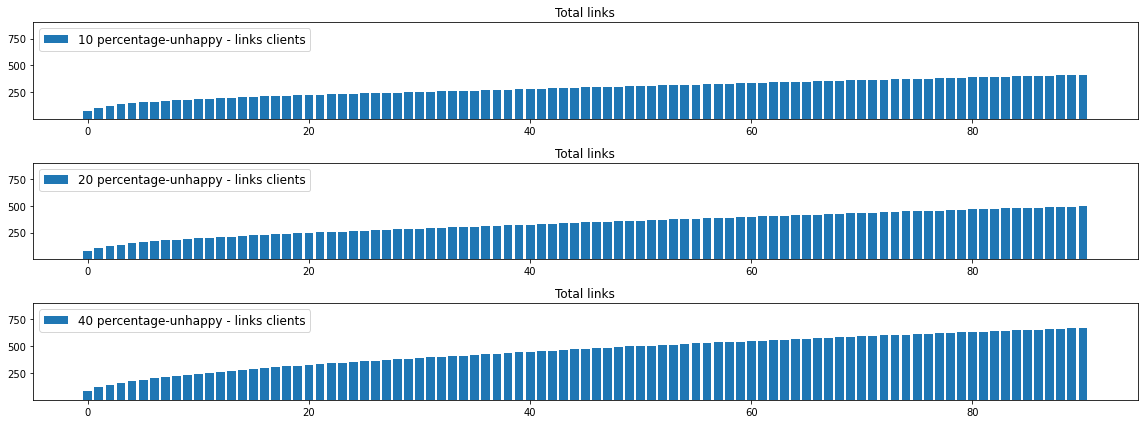

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['links'], label='{} percentage-unhappy - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,900)
plt.show()

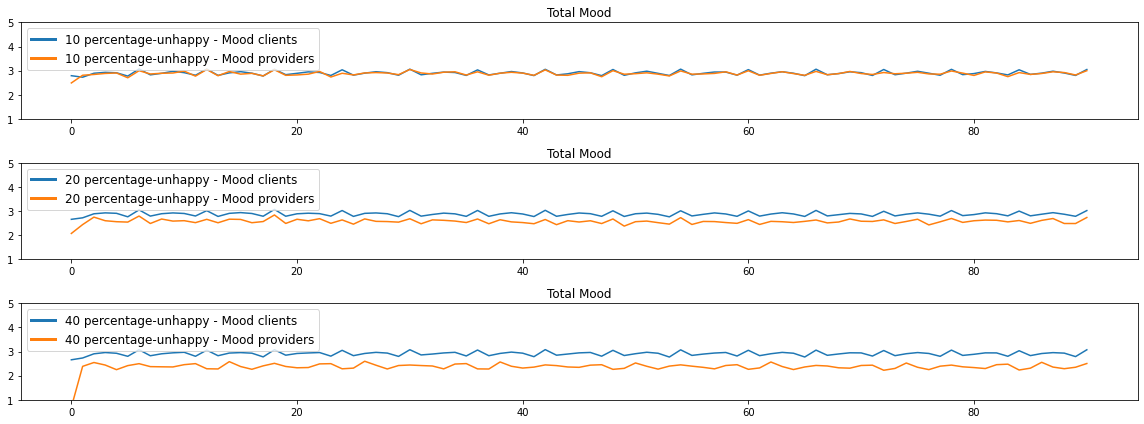

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['mood_clients'], label='{} percentage-unhappy - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['mood_providers'], label='{} percentage-unhappy - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



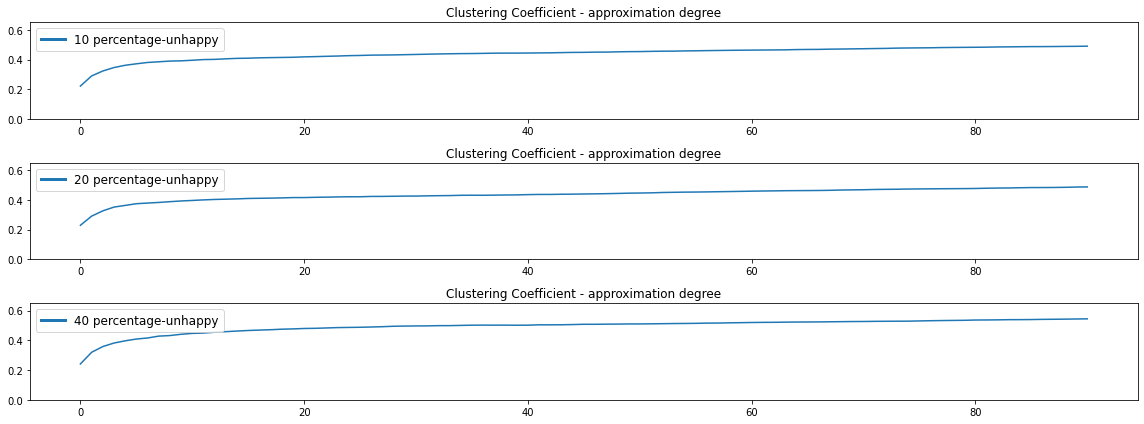

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['cluster_coef'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



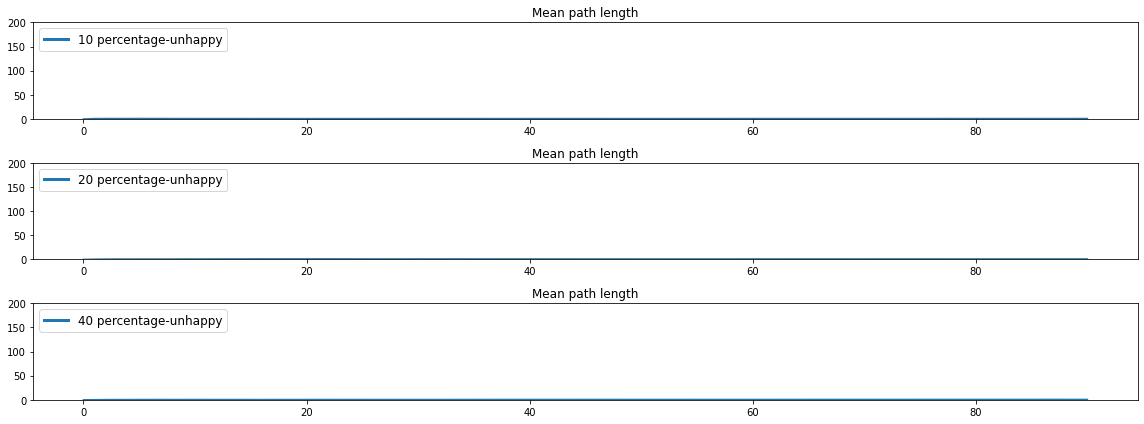

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['paths'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



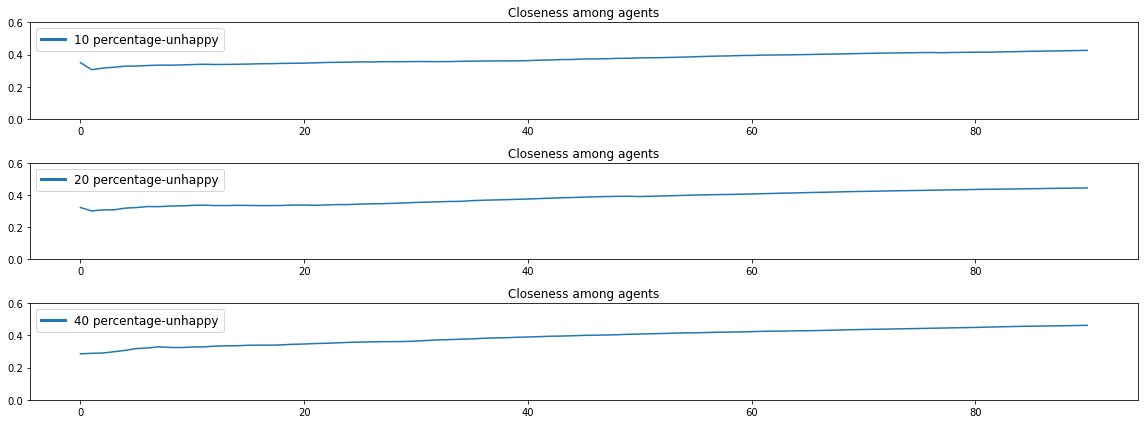

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['closeness'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



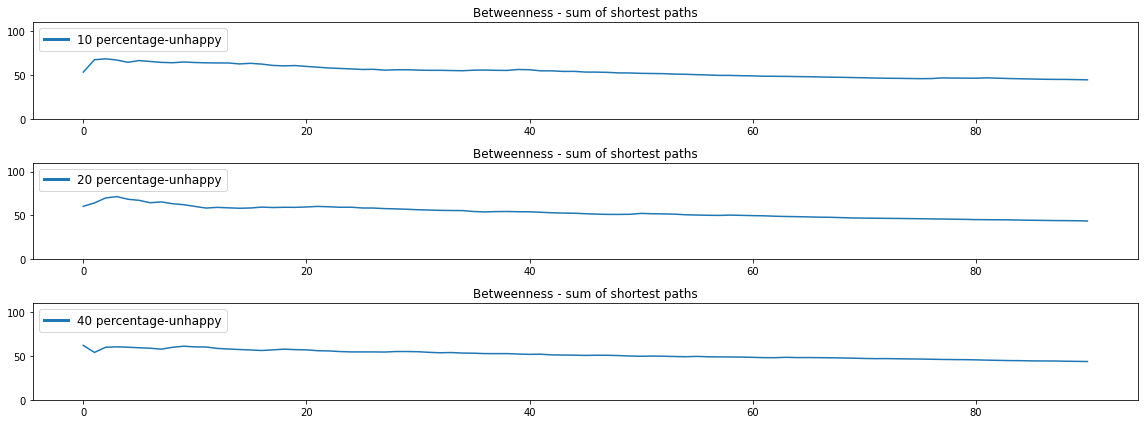

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['betweenness'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,110)
plt.show()


In [13]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==5].mean()

In [14]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [15]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,-0.4403,0.6602
1,mood_providers,22.8321,0.0
2,cluster_coef,-7.8027,0.0
3,paths,14.4617,0.0
4,closeness,-2.8236,0.0053
5,betweenness,2.5938,0.0103
6,centroid-x,5.0419,0.0
7,centroid-y,16.5043,0.0
8,links,-9.0696,0.0
9,total_mood,16.8949,0.0


In [16]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,0.1939,0.6602
1,mood_providers,521.303,0.0
2,cluster_coef,60.8821,0.0
3,paths,209.1396,0.0
4,closeness,7.9728,0.0053
5,betweenness,6.7279,0.0103
6,centroid-x,25.4203,0.0
7,centroid-y,272.3906,0.0
8,links,82.2568,0.0
9,total_mood,285.4371,0.0


In [17]:
df_move.reset_index().columns

Index(['percentage-unhappy', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness', 'centroid-x',
       'centroid-y', 'links', 'total_mood'],
      dtype='object')

In [18]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'links','total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'links.f','total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



mood_clients      0.3565
mood_providers    0.1315
cluster_coef      0.8245
paths            -0.1069
closeness         0.9277
betweenness       0.8404
total_mood        0.2461
centroid-x        0.7084
centroid-y       -0.5599
dtype: float64

In [20]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood','links',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f','links.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients      0.1214
mood_providers    0.1080
cluster_coef      0.8015
paths             0.6273
closeness         0.9895
betweenness       0.9043
total_mood        0.9889
centroid-x        0.1100
centroid-y       -0.1342
dtype: float64

In [21]:
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1.5].iloc[0:30,2:].shape

(0, 10)

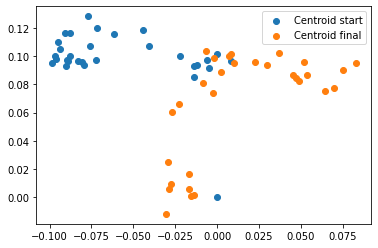

In [22]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

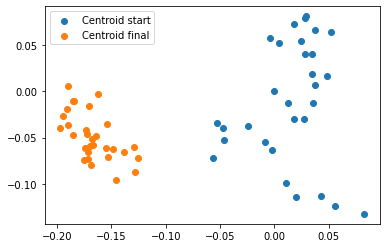

In [23]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [24]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef   paths  \
percentage-unhappy step                                                       
10                 0           2.7929          2.4929        0.2218  0.0000   
                   1           2.7308          2.8119        0.2897  0.9395   
                   2           2.8942          2.8435        0.3230  1.0180   
                   3           2.9317          2.8866        0.3461  1.0078   
                   4           2.9147          2.9058        0.3615  1.0050   
...                               ...             ...           ...     ...   
40                 86          2.9165          2.5528        0.5412  0.8226   
                   87          2.9534          2.3551        0.5419  0.8206   
                   88          2.9326          2.2877        0.5427  0.8192   
                   89          2.7893          2.3480        0.5438  0.8176   
                   90          3.0712          2.5029        0.5447  0.8163   

                         closeness  betweenness  centroid-x  centroid-y  \
percentage-unhappy step                                                   
10                 0        0.3503      53.3707      0.0000      0.0000   
                   1        0.3061      67.4475     -0.0719      0.1204   
                   2        0.3160      68.5076     -0.0772      0.1285   
                   3        0.3214      67.1634     -0.0910      0.1164   
                   4        0.3282      64.5523     -0.0879      0.1165   
...                            ...          ...         ...         ...   
40                 86       0.4580      44.2147     -0.1485     -0.0624   
                   87       0.4590      44.1880     -0.1727     -0.0465   
                   88       0.4603      43.9336     -0.1752     -0.0744   
                   89       0.4613      43.7756     -0.1280     -0.0866   
                   90       0.4626      43.5773     -0.1260     -0.0724   

                            links  total_mood  
percentage-unhappy step                        
10                 0      78.3333      5.2859  
                   1     105.1358      5.5426  
                   2     122.9136      5.7377  
                   3     136.6667      5.8182  
                   4     147.0617      5.8205  
...                           ...         ...  
40                 86    654.2346      5.4693  
                   87    658.4938      5.3085  
                   88    662.2469      5.2203  
                   89    665.8148      5.1373  
                   90    669.6914      5.5741  

[364 rows x 10 columns]

/tmp/ipykernel_301283/741047512.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


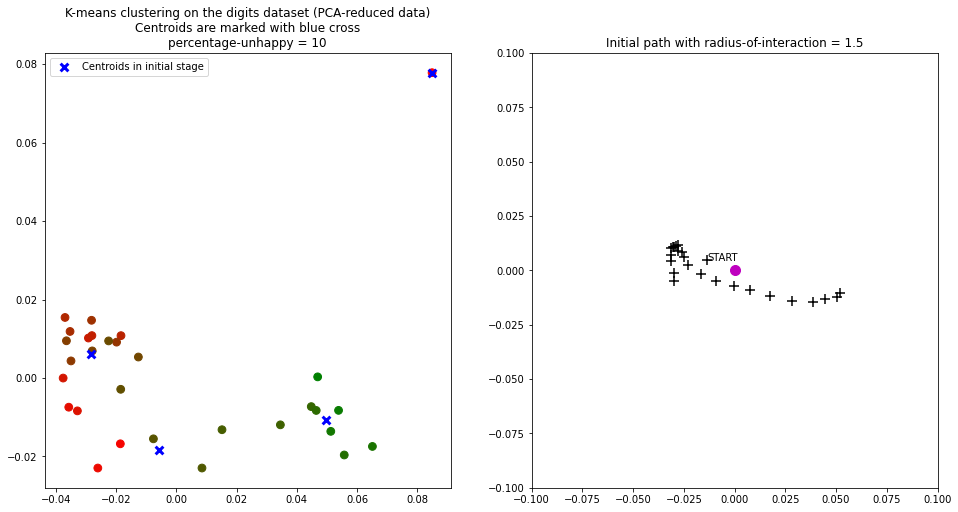

In [25]:
lag=7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

In [26]:
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1].shape

(0, 12)

/tmp/ipykernel_301283/3037804788.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


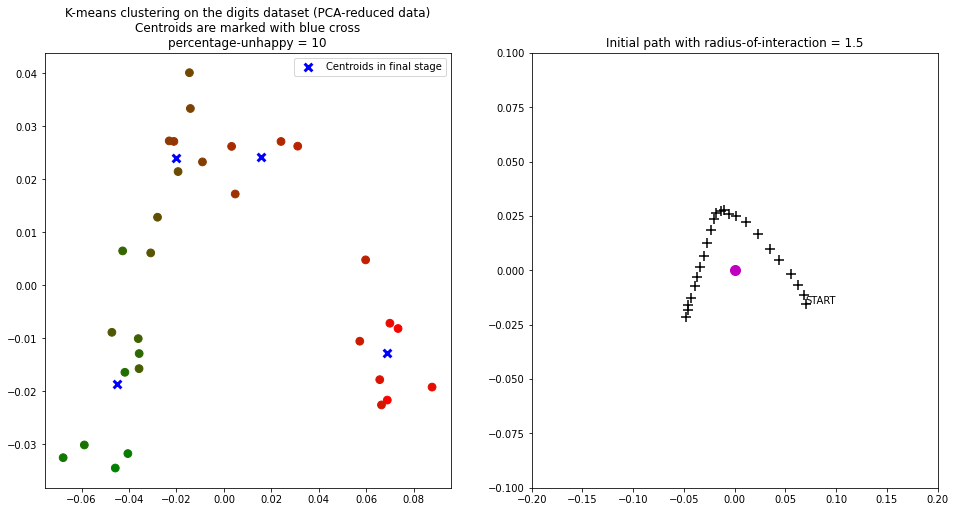

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_301283/1423708788.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


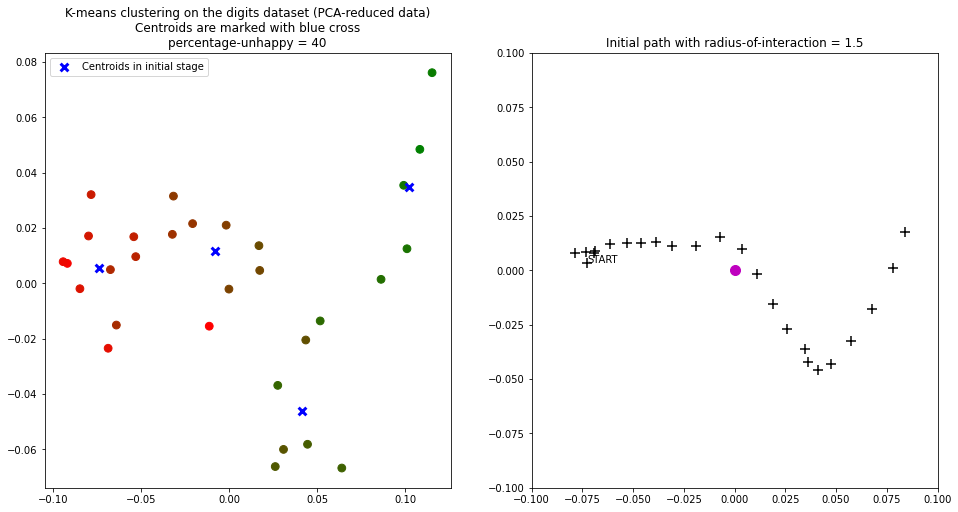

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 40"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_301283/2837785209.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


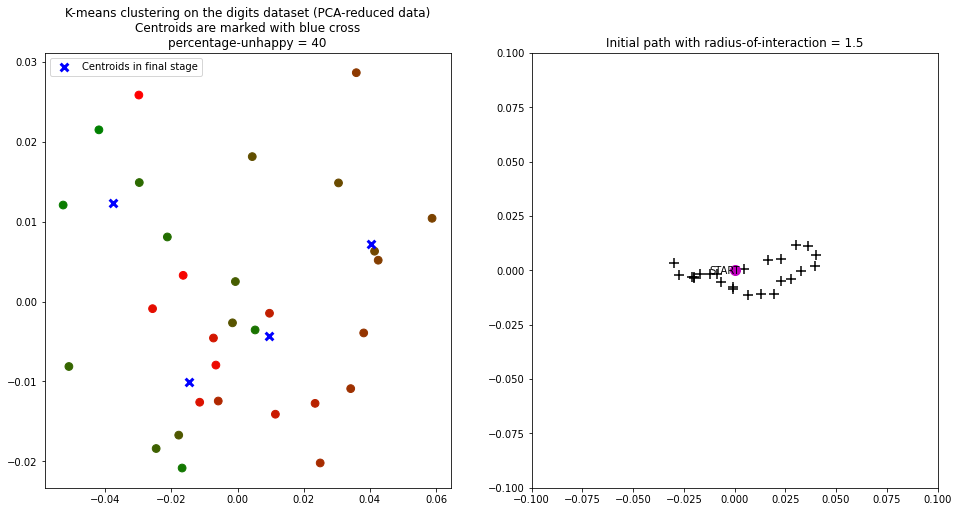

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 40"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()